In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post
from utils.plotting_utils import plots

In [8]:
def make_plot(task, short_model_name, metric, fit_reg=False):
    params = {
        "results_dir": "../../../results/",
        "experiment": "acl",
        "short_model_name": short_model_name,
        "task": task,
        "metric": metric
    }

    M = post.Metrics(**params)
    df = M.transfer_loss()
    df.loc[:, ["Within-Score", "Cross-Score", "Transfer-Loss"]] *= 100

    plots.scatter(x="Within-Score", 
                  y="Transfer-Loss",
                  data=df,
                  kind="relplot",
                  style="Test-Group",
                  xaxis_title="In-language Score",
                  yaxis_title="Transfer-Loss",
                  title=(task + " " + short_model_name).upper(),
                  remove_labels=True,
                  alpha=0.75)

    leg = plt.gca().get_legend()
    leg.texts[0].set_text("Train Group")
    leg.texts[5].set_text("Test Group")

    print(pearsonr(x=df["Within-Score"], y=df["Transfer-Loss"]))
    
    if fit_reg:
        x = df["Within-Score"].values
        y = df["Transfer-Loss"].values

        m, b = np. polyfit(x, y, 1)
        x = np.arange(x.min(), x.max(), 1)
        plt.plot(x, m*x + b, "gray")

# PoS

In [9]:
task = "pos"
metric = "Accuracy"

(0.2665659522797949, 2.2477286928021584e-06)
Saving to ../../../results/acl/mbert/plots/within_vs_transfer_pos.pdf


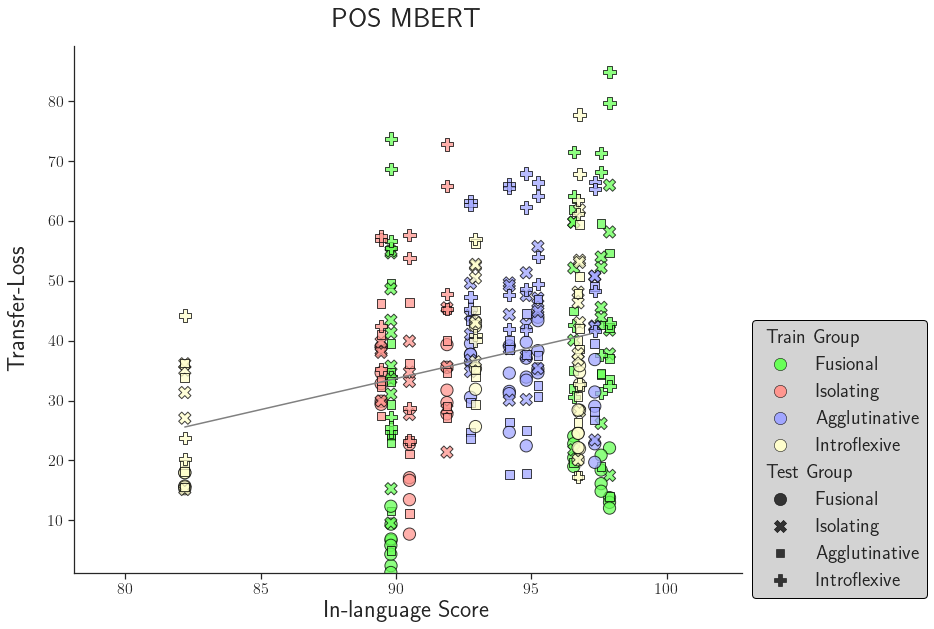

In [11]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric, fit_reg=True)
save_to = "../../../results/acl/{}/plots/within_vs_transfer_{}.pdf".format(short_model_name, task)
print("Saving to", save_to)
plt.savefig(save_to, dpi=400, bbox_inches="tight")

(0.23057266107014168, 4.663822386220883e-05)
Saving to ../../../results/acl/xlm-roberta/plots/within_vs_transfer_pos.pdf


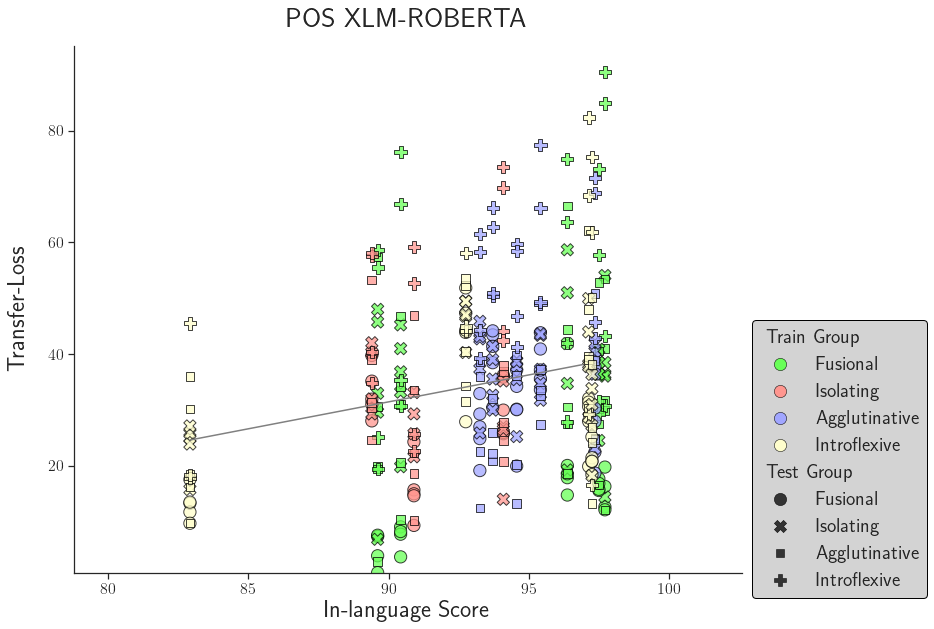

In [12]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric, fit_reg=True)
save_to = "../../../results/acl/{}/plots/within_vs_transfer_{}.pdf".format(short_model_name, task)
print("Saving to", save_to)
plt.savefig(save_to, dpi=400, bbox_inches="tight")

# Sentiment

In [13]:
task = "sentiment"
metric = "Macro_F1"

(0.40596884074617456, 5.304095878880148e-15)
Saving to ../../../results/acl/mbert/plots/within_vs_transfer_sentiment.pdf


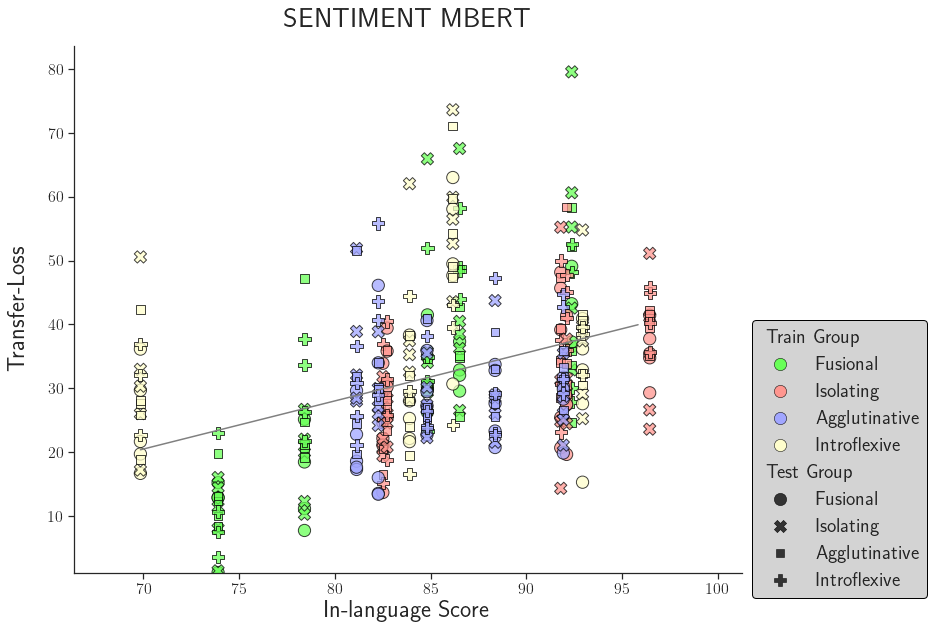

In [14]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric, fit_reg=True)
save_to = "../../../results/acl/{}/plots/within_vs_transfer_{}.pdf".format(short_model_name, task)
print("Saving to", save_to)
plt.savefig(save_to, dpi=400, bbox_inches="tight")

(0.24510771495650333, 4.509743327786002e-06)
Saving to ../../../results/acl/xlm-roberta/plots/within_vs_transfer_sentiment.pdf


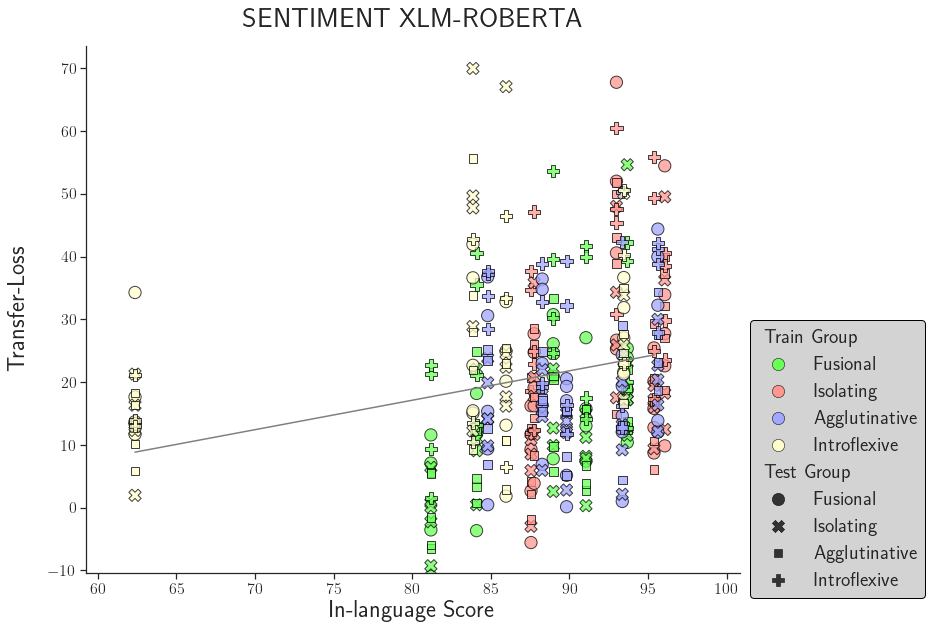

In [15]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric, fit_reg=True)
save_to = "../../../results/acl/{}/plots/within_vs_transfer_{}.pdf".format(short_model_name, task)
print("Saving to", save_to)
plt.savefig(save_to, dpi=400, bbox_inches="tight")